In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy.random as r
from tqdm import tqdm
from scipy.optimize import minimize_scalar
from functools import partial
import math

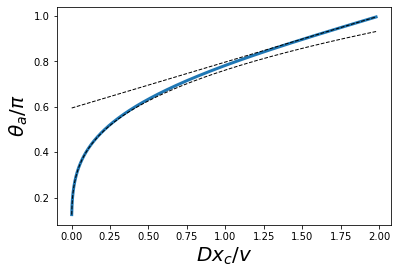

In [2]:

def equation(theta_b, D):
    return 0.5 * np.sin(theta_b) * theta_b + np.cos(theta_b) - (1 - D)

# Generate a range of values for D
D_values = np.linspace(0.001, 2, 10000)  # Adjust the range as needed
D_plot=[]
# Solve the equation for each D value within the range (0, pi)
theta_b_values = []
for D in D_values:
    theta_b = fsolve(equation, 0.5*np.pi, args=(D,))
    if 0 <= theta_b <= np.pi:
        theta_b_values.append(theta_b[0]/np.pi)
        D_plot.append(D)

# Plot the solution
plt.plot(D_plot, theta_b_values,linewidth=3)
plt.xlabel(r'$Dx_c/v$',fontsize=20)
plt.ylabel(r'$θ_a/\pi$',fontsize=20)

plt.plot(D_plot,[((24*z)**(1/4)+0.18072*z**(3/4))/np.pi for z in D_plot],linestyle='--',linewidth=1,color='black')
plt.plot(D_plot,[1+(2/np.pi**2)*(z-2) for z in D_plot],linestyle='--',linewidth=1,color='black')


100%|█████████████████████████████████████████████| 9/9 [01:00<00:00,  6.78s/it]


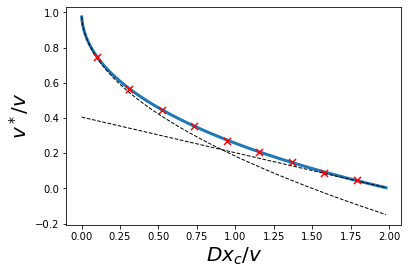

In [3]:
c=[np.sin(z*np.pi)/(z*np.pi) for z in theta_b_values]
plt.plot(D_plot,c,linewidth=3)
plt.xlabel(r'$Dx_c/v$',fontsize=20)
plt.ylabel(r'$v^*/v$',fontsize=20)
plt.plot(D_plot,[1-np.sqrt(2*z/3) for z in D_plot],linestyle='--',linewidth=1,color='black')
plt.plot(D_plot,[2*(2-z)/np.pi**2 for z in D_plot],linestyle='--',linewidth=1,color='black')


D_values = np.linspace(0.1, 2, 10)  # Adjust the range as needed
D_plot=[]
# Solve the equation for each D value within the range (0, pi)
theta_b_values = []
for D in D_values:
    theta_b = fsolve(equation, 0.5*np.pi, args=(D,))
    if 0 <= theta_b <= np.pi:
        theta_b_values.append(theta_b[0]/np.pi)
        D_plot.append(D)
        
nstep=10**6
dt=0.01

t=dt*nstep
cs=[]
for i in tqdm(range(len(theta_b_values))):
    theta_b=theta_b_values[i]*np.pi
    D=D_plot[i]
    theta=0 
    cost=0
    for _ in range(nstep):
        theta=theta+np.sqrt(2*D*dt)*r.normal()
        if np.abs(theta)>theta_b:
            theta=0
            cost=cost+1
        cost=cost-np.cos(theta)*dt
    cs.append(-cost/t)
plt.scatter(D_plot,cs,color='r',marker='x',s=50,zorder=3)
